# Pacotes e dados

## Pacotes

In [5]:
# Install Kaggle API for download competition data
!pip3 install -q kaggle

In [6]:
!pip install pydicom

In [1]:
# Importar os pacotes
import numpy as np
import pandas as pd
import os
import random 
from shutil import copyfile
import pydicom as dicom
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras import backend as K 
K.set_image_data_format('channels_last')

In [8]:
!wget http://download.cs.stanford.edu/deep/CheXpert-v1.0-small.zip

--2020-06-23 12:40:31--  http://download.cs.stanford.edu/deep/CheXpert-v1.0-small.zip
Resolving download.cs.stanford.edu (download.cs.stanford.edu)... 171.64.64.22
Connecting to download.cs.stanford.edu (download.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11557753157 (11G) [application/zip]
Saving to: ‘CheXpert-v1.0-small.zip’

CheXpert-v1.0-small 100%[===================>]  10.76G  1.90MB/s    in 91m 45s 

2020-06-23 14:12:17 (2.00 MB/s) - ‘CheXpert-v1.0-small.zip’ saved [11557753157/11557753157]



In [9]:
!unzip CheXpert-v1.0-small.zip

Streaming output truncated to the last 5000 lines.
  inflating: CheXpert-v1.0-small/train/patient21643/study3/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient21643/study1/
  inflating: CheXpert-v1.0-small/train/patient21643/study1/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient21643/study2/
  inflating: CheXpert-v1.0-small/train/patient21643/study2/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient63218/
   creating: CheXpert-v1.0-small/train/patient63218/study1/
  inflating: CheXpert-v1.0-small/train/patient63218/study1/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient08046/
   creating: CheXpert-v1.0-small/train/patient08046/study1/
  inflating: CheXpert-v1.0-small/train/patient08046/study1/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient08046/study5/
  inflating: CheXpert-v1.0-small/train/patient08046/study5/view1_frontal.jpg  
  inflating: CheXpert-v1.0-small/train/patient08046/study5/view3_late

## Dados

### Kaggle rsna

In [10]:
kjson = pd.read_json('kaggle.json',typ='series')

In [11]:
# enter your Kaggle credentionals here

os.environ['KAGGLE_USERNAME']= "matheuscoradini"
os.environ['KAGGLE_KEY']= kjson.key

In [12]:
!kaggle datasets download --force tawsifurrahman/covid19-radiography-database

 99% 1.14G/1.15G [00:28<00:00, 37.3MB/s]
100% 1.15G/1.15G [00:28<00:00, 43.3MB/s]


In [13]:
!kaggle datasets download --force raddar/tuberculosis-chest-xrays-shenzhen

100% 3.50G/3.51G [01:29<00:00, 31.1MB/s]
100% 3.51G/3.51G [01:29<00:00, 42.1MB/s]


In [14]:
!unzip covid19-radiography-database.zip

Archive:  covid19-radiography-database.zip
  inflating: COVID-19 Radiography Database/COVID-19.metadata.xlsx  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (1).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (10).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (100).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (101).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (102).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (103).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (104).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (105).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (106).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (107).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (108).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (109).png  
  inflating: COV

In [15]:
!unzip tuberculosis-chest-xrays-shenzhen.zip

Archive:  tuberculosis-chest-xrays-shenzhen.zip
  inflating: images/images/CHNCXR_0001_0.png  
  inflating: images/images/CHNCXR_0002_0.png  
  inflating: images/images/CHNCXR_0003_0.png  
  inflating: images/images/CHNCXR_0004_0.png  
  inflating: images/images/CHNCXR_0005_0.png  
  inflating: images/images/CHNCXR_0006_0.png  
  inflating: images/images/CHNCXR_0007_0.png  
  inflating: images/images/CHNCXR_0008_0.png  
  inflating: images/images/CHNCXR_0009_0.png  
  inflating: images/images/CHNCXR_0010_0.png  
  inflating: images/images/CHNCXR_0011_0.png  
  inflating: images/images/CHNCXR_0012_0.png  
  inflating: images/images/CHNCXR_0013_0.png  
  inflating: images/images/CHNCXR_0014_0.png  
  inflating: images/images/CHNCXR_0015_0.png  
  inflating: images/images/CHNCXR_0016_0.png  
  inflating: images/images/CHNCXR_0017_0.png  
  inflating: images/images/CHNCXR_0018_0.png  
  inflating: images/images/CHNCXR_0019_0.png  
  inflating: images/images/CHNCXR_0020_0.png  
  inflating:

# Metadata

In [2]:
meta_tub = pd.read_csv('shenzhen_metadata.csv')

In [3]:
meta_tub.head()

,study_id,sex,age,findings
0,CHNCXR_0001_0.png,Male,45,normal
1,CHNCXR_0002_0.png,Male,63,normal
2,CHNCXR_0003_0.png,Female,48,normal
3,CHNCXR_0004_0.png,Male,58,normal
4,CHNCXR_0005_0.png,Male,28,normal


In [4]:
meta_tub.findings.value_counts().head(20)

normal                                         326
bilateral PTB                                   61
Right PTB                                       45
PTB in the right upper field                    27
PTB in the left upper field                     19
STB                                             19
left PTB                                        19
Bilateral secondary PTB                         16
secondary PTB  in the right upper field         12
right secondary PTB                             10
secondary PTB  in the left upper field           8
PTB in the bilateral upper field                 8
secondary PTB  in the bilateral upper field      6
right upper PTB                                  6
PTB in the right lower field                     4
left secondary PTB                               3
PTB  in the right upper field                    3
PTB in the bilateral upper fields                3
PTB in the left lower field                      3
Old PTB in the right upper fiel

In [5]:
meta_tub.loc[meta_tub['findings'] == 'normal', 'findings'] = 1
meta_tub.loc[meta_tub['findings'] != 1, 'findings'] = 3

In [6]:
meta_tub.findings.value_counts()

3    336
1    326
Name: findings, dtype: int64

In [7]:
y_tub = meta_tub.findings

## Diretório de imagem

In [8]:
# Lista o conteúdo 
os.listdir('COVID-19 Radiography Database/')

['COVID-19',
 'Viral Pneumonia',
 'COVID-19.metadata.xlsx',
 'NORMAL',
 'Viral Pneumonia.matadata.xlsx',
 'NORMAL.metadata.xlsx',
 'README.md.txt']

In [9]:
imagens_normal = 'COVID-19 Radiography Database/NORMAL'
imagens_covid = 'COVID-19 Radiography Database/COVID-19'
imagens_pneu = 'COVID-19 Radiography Database/Viral Pneumonia'
imagens_sh = 'images/images'
imagens_xpert_train = 'CheXpert-v1.0-small/train'
imagens_xpert_valid = 'CheXpert-v1.0-small/valid'

In [10]:
print(len(os.listdir(imagens_normal)))

1341


In [11]:
print(len(os.listdir(imagens_covid)))

219


In [12]:
print(len(os.listdir(imagens_pneu)))

1345


In [13]:
print(len(os.listdir(imagens_sh)))

662


In [14]:
print(len(os.listdir(imagens_xpert_train)))

64540


In [15]:
print(len(os.listdir(imagens_xpert_valid)))

200


In [16]:
covid_image_list = os.listdir(imagens_normal)
normal_image_list = os.listdir(imagens_covid)
pneu_image_list = os.listdir(imagens_pneu)
sh_image_list = os.listdir(imagens_sh)
xpert_train_list = os.listdir(imagens_xpert_train)
xpert_test_list = os.listdir(imagens_xpert_valid)

# Stanford CheXpert

In [17]:
train = pd.read_csv('CheXpert-v1.0-small/train.csv')
valid = pd.read_csv('CheXpert-v1.0-small/valid.csv')

In [18]:
train = train[train['Frontal/Lateral'] == 'Frontal']
valid = valid[valid['Frontal/Lateral'] == 'Frontal']

In [19]:
train['Patient'] = train.Path.apply(lambda x: x[:38])
valid['Patient'] = valid.Path.apply(lambda x: x[:38])

In [20]:
train = train.drop_duplicates(subset='Patient')
valid = valid.drop_duplicates(subset='Patient')

In [21]:
train.shape, valid.shape

((64534, 20), (200, 20))

In [22]:
train.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Patient
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,CheXpert-v1.0-small/train/patient00001
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN,CheXpert-v1.0-small/train/patient00002
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,CheXpert-v1.0-small/train/patient00003
5,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Frontal,PA,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,CheXpert-v1.0-small/train/patient00004
7,CheXpert-v1.0-small/train/patient00005/study1/...,Male,33,Frontal,PA,1.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,CheXpert-v1.0-small/train/patient00005


In [23]:
for i in train.columns:
  train = train[train[i] != -1]

In [24]:
train.shape

(40150, 20)

In [25]:
train['No Finding'].value_counts()

1.0    10008
Name: No Finding, dtype: int64

In [26]:
train['Pneumonia'].value_counts()

1.0    1268
0.0     893
Name: Pneumonia, dtype: int64

In [27]:
train['Edema'].value_counts()

1.0    7564
0.0    5304
Name: Edema, dtype: int64

In [28]:
train['Fracture'].value_counts()

1.0    2438
0.0    1367
Name: Fracture, dtype: int64

In [29]:
train['Fracture'].value_counts()

1.0    2438
0.0    1367
Name: Fracture, dtype: int64

In [30]:
train_normal = train[train['No Finding'] == 1]

# Preparing features

In [31]:
paths = []
y = []

for dirname, _, filenames in os.walk('COVID-19 Radiography Database/Viral Pneumonia'):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            paths.append(os.path.join(dirname, filename))
            y.append(0)
            
for dirname, _, filenames in os.walk('COVID-19 Radiography Database/NORMAL'):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            paths.append(os.path.join(dirname, filename))
            y.append(1)   

for dirname, _, filenames in os.walk('COVID-19 Radiography Database/COVID-19'):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            paths.append(os.path.join(dirname, filename))
            y.append(2)

for dirname, _, filenames in os.walk(imagens_sh):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            paths.append(os.path.join(dirname, filename))
y_tub = list(y_tub)
y.extend(y_tub)

for path in train_normal.Path:
    paths.append(path)
    y.append(1)

In [32]:
len(paths)

13575

In [33]:
len(y)

13575

In [34]:
paths[-1]

'CheXpert-v1.0-small/train/patient64540/study1/view1_frontal.jpg'

In [35]:
X = []
for i in paths:
    image = cv2.imread(i)
    try:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    except:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (128, 128))

    X.append(image)

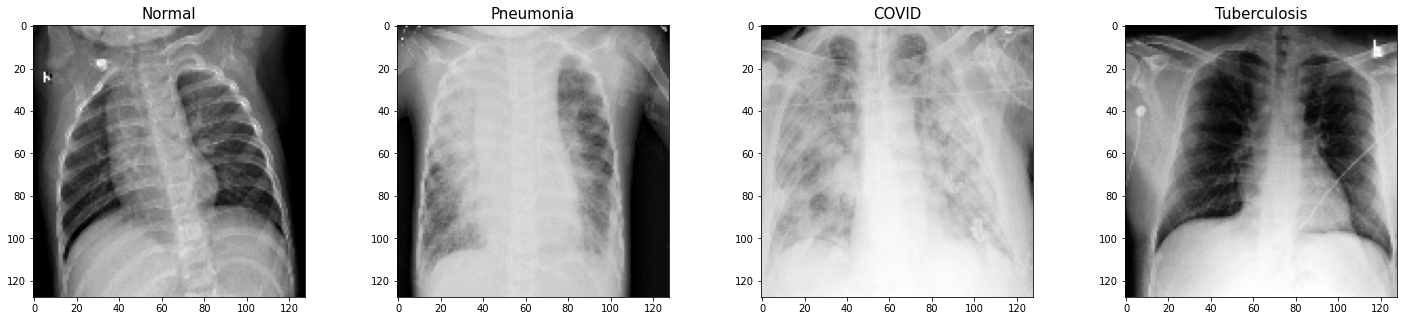

In [36]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols = 4,nrows = 1, figsize = (25,5))
ax1.imshow(X[1500],cmap='gray')
ax2.imshow(X[0],cmap='gray')
ax3.imshow(X[2900],cmap='gray')
ax4.imshow(X[4000],cmap='gray')

ax1.set_title('Normal',fontsize=15)
ax2.set_title('Pneumonia',fontsize=15)
ax3.set_title('COVID',fontsize=15)
ax4.set_title('Tuberculosis',fontsize=15)

plt.show()

In [37]:
X = np.array(X)/255
y = np.array(y)

In [38]:
X = X.reshape(-1,128,128,1)

In [39]:
X.shape

(13575, 128, 128, 1)

# Train Test Split

In [40]:
Xtrain, Xval, ytrain, yval  = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [41]:
ycat_val = to_categorical(yval,4)
ycat_train = to_categorical(ytrain,4)

# Model

In [70]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(128,128,1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(128,128,1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(128,128,1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(126))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)       

In [72]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [73]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [74]:
cw = {0: 1, 1: 1, 2:2, 3:1}
BS = 32
results = model.fit_generator(image_gen.flow(Xtrain, ycat_train, batch_size=BS),
                              steps_per_epoch=len(Xtrain)/BS, epochs=100,
                              validation_data=(Xval,ycat_val), callbacks = [early_stop], class_weight=cw)

Epoch 1/100
285/284 [==============================] - 17s 60ms/step - loss: 0.3983 - accuracy: 0.8767 - val_loss: 0.2282 - val_accuracy: 0.9158
Epoch 2/100
285/284 [==============================] - 17s 60ms/step - loss: 0.2817 - accuracy: 0.9056 - val_loss: 0.1835 - val_accuracy: 0.9281
Epoch 3/100
285/284 [==============================] - 17s 59ms/step - loss: 0.2505 - accuracy: 0.9157 - val_loss: 0.1594 - val_accuracy: 0.9424
Epoch 4/100
285/284 [==============================] - 17s 59ms/step - loss: 0.2146 - accuracy: 0.9277 - val_loss: 0.1446 - val_accuracy: 0.9446
Epoch 5/100
285/284 [==============================] - 17s 59ms/step - loss: 0.2078 - accuracy: 0.9295 - val_loss: 0.1307 - val_accuracy: 0.9475
Epoch 6/100
285/284 [==============================] - 17s 59ms/step - loss: 0.1948 - accuracy: 0.9342 - val_loss: 0.1389 - val_accuracy: 0.9422
Epoch 7/100
285/284 [==============================] - 17s 59ms/step - loss: 0.1855 - accuracy: 0.9378 - val_loss: 0.1236 - val_ac

In [75]:
model.save_weights("model.h5")

In [76]:
model.metrics_names

['loss', 'accuracy']

In [77]:
losses = pd.DataFrame(model.history.history)

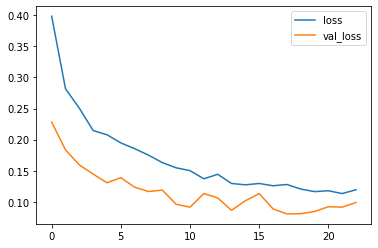

In [78]:
losses[['loss','val_loss']].plot()
plt.show()

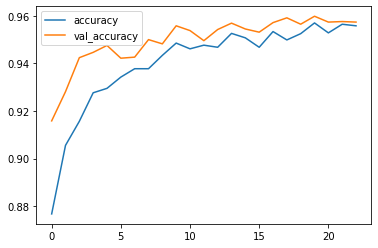

In [79]:
losses[['accuracy','val_accuracy']].plot()
plt.show()

In [80]:
pred = model.predict_classes(Xval)

In [81]:
# 0: Pneumonia
# 1: Normal
# 2: COVID-19
# 3: Tuberculosis

from sklearn.metrics import classification_report
print(classification_report(yval, pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       437
           1       0.98      0.97      0.98      3861
           2       0.88      0.89      0.88        64
           3       0.49      0.89      0.63       118

    accuracy                           0.96      4480
   macro avg       0.83      0.91      0.85      4480
weighted avg       0.97      0.96      0.96      4480



In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yval, pred)

array([[ 389,   44,    3,    1],
       [  11, 3738,    2,  110],
       [   4,    3,   57,    0],
       [   0,   10,    3,  105]])

In [83]:
y.shape

(13575,)